In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# https://www.kaggle.com/datasets/camnugent/california-housing-prices
df=pd.read_csv("housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

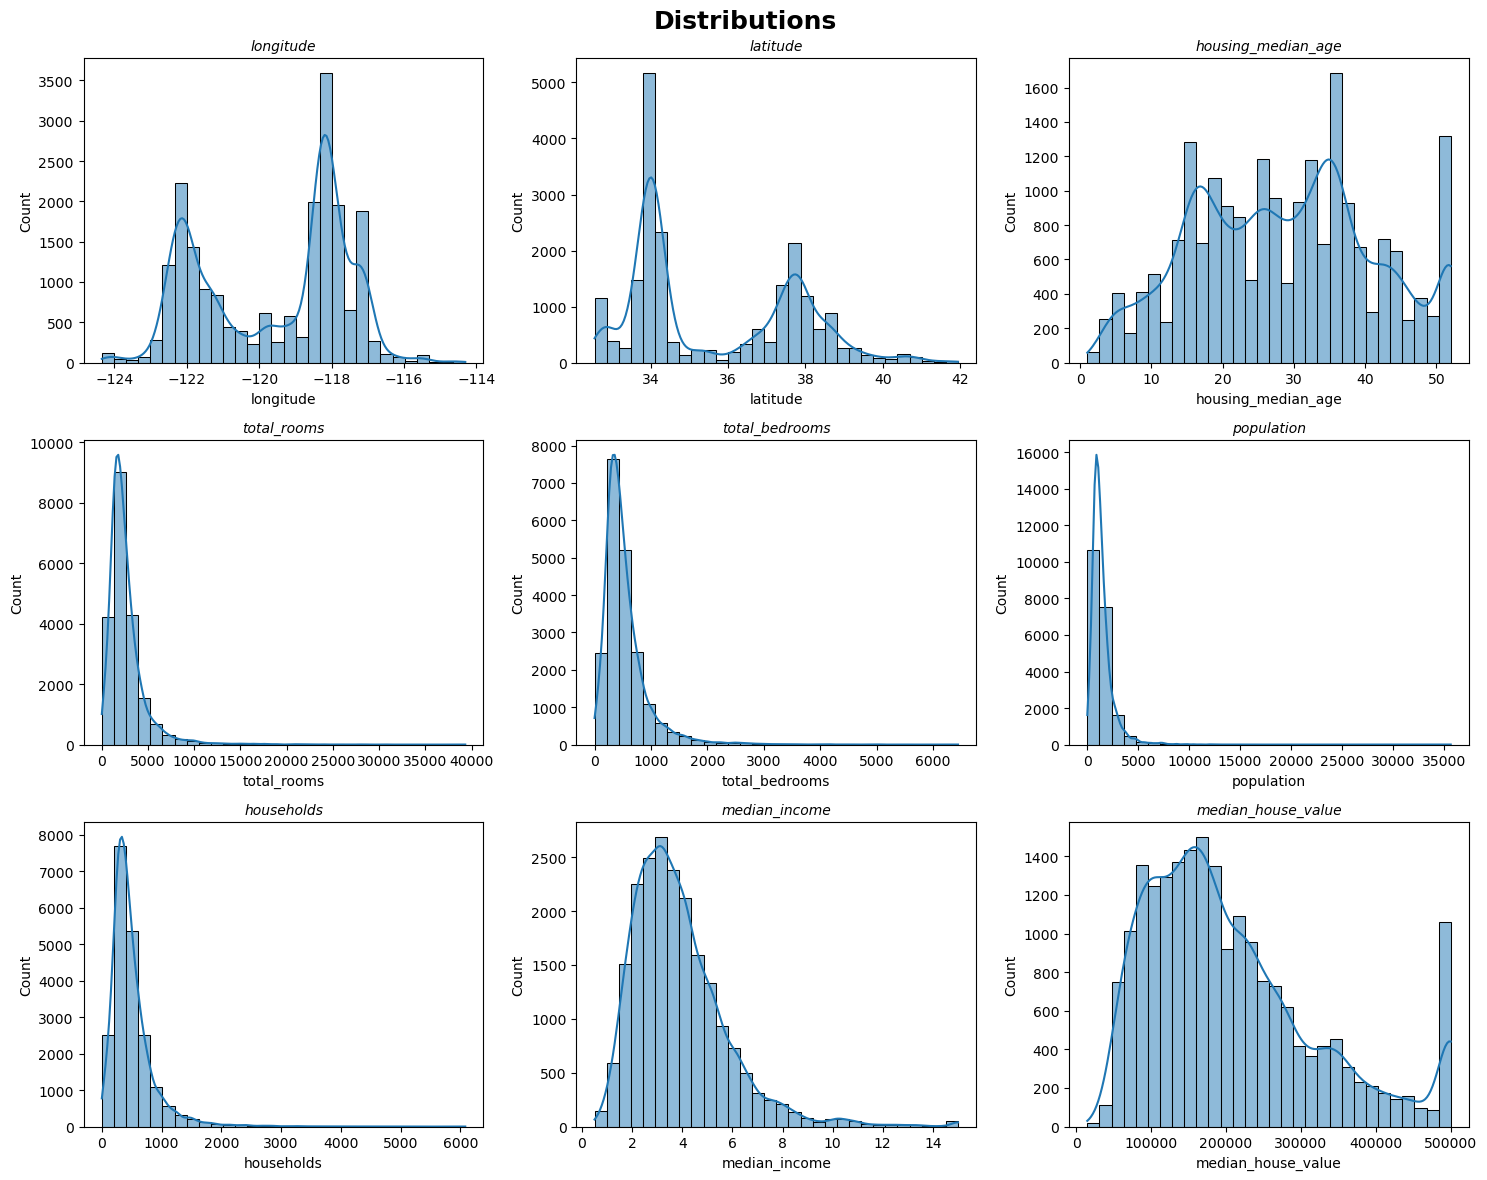

In [9]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(15,12))
fig.suptitle("Distributions", fontsize = 18, fontweight = "bold")

for i, col in enumerate(columns):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]
    sns.histplot(data = df, x = col, kde=True, ax=ax, bins=30)
    ax.set_title(col, fontsize=10, fontstyle = "italic")

plt.tight_layout()
plt.show()

In [10]:
import math
def plot_all_histograms(df, title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols=3
    n_rows=math.ceil(len(num_cols)/n_cols)
    plt.figure(figsize=(5*n_cols,4*n_rows))
    
    for i, col in enumerate(num_cols,1):
        plt.subplot(n_rows,n_cols,i)
        sns.histplot(df[col],bins=30, kde=True)
        plt.title(f"{title_prefix} {col}")
        plt.xlabel(""),
        plt.ylabel("")
    
    plt.tight_layout()
    plt.show()

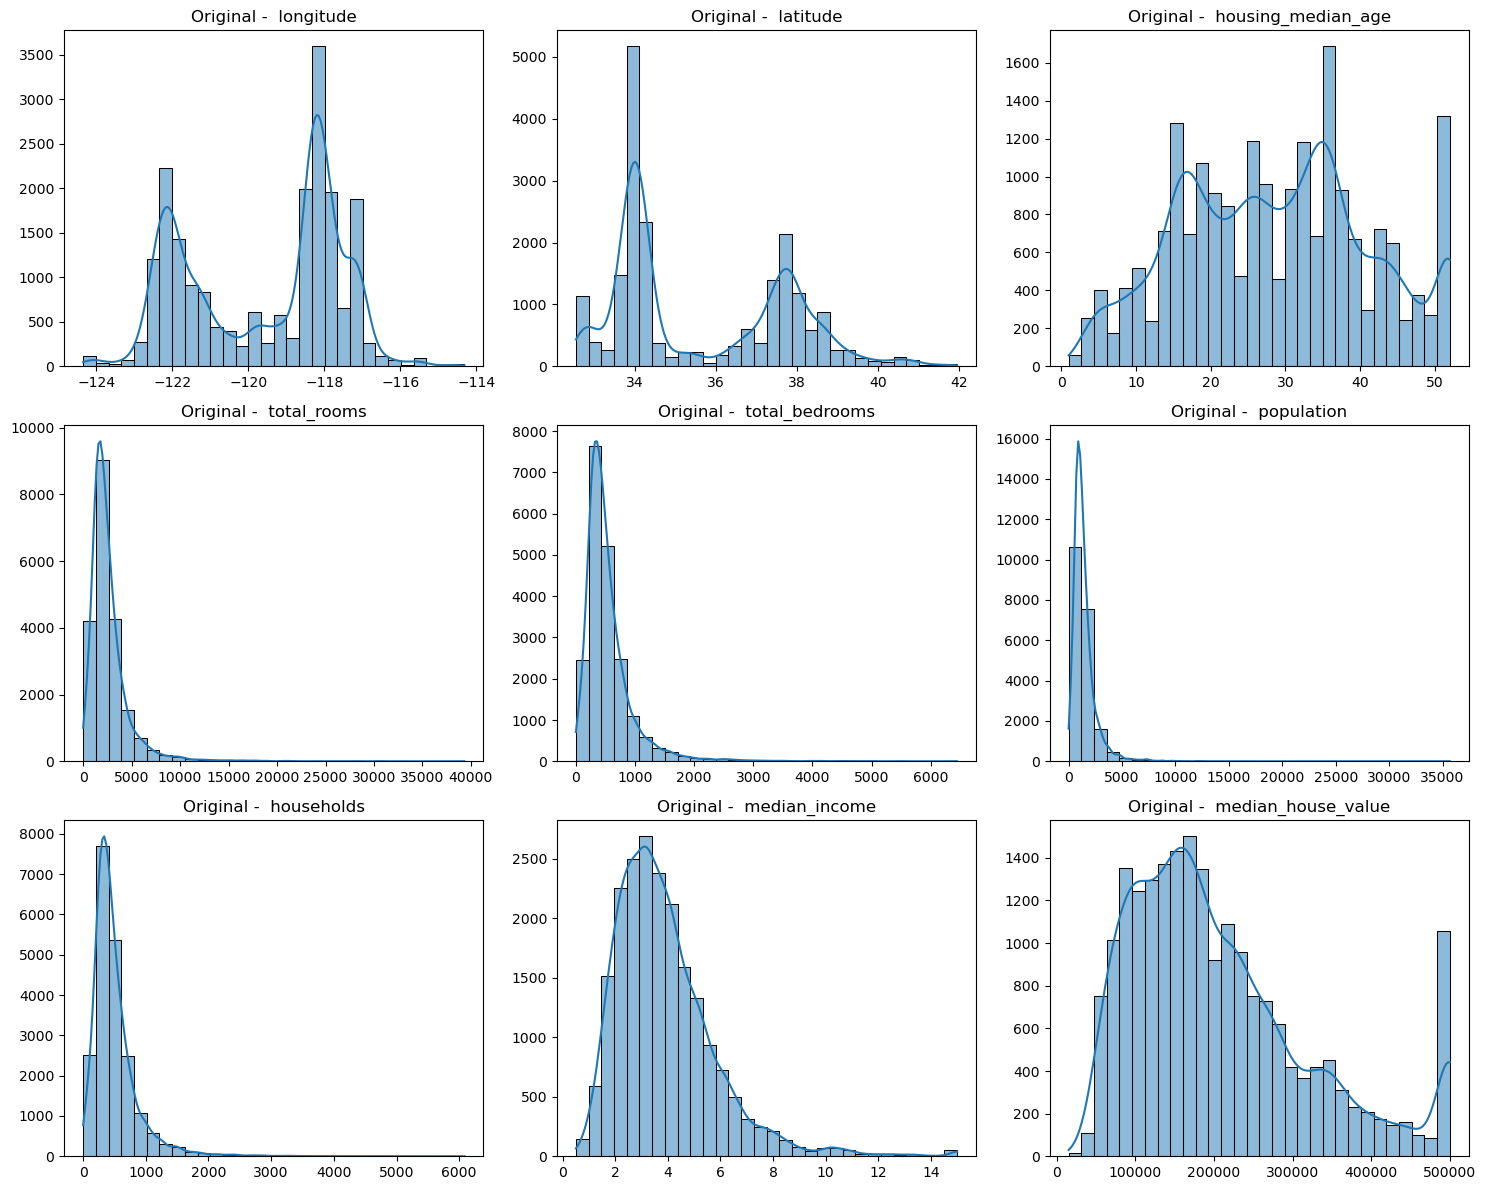

In [11]:
plot_all_histograms(df,title_prefix= "Original - ")

In [12]:
df.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [13]:
def find_outliers_iqr(df, threshold = 1.5):
    outlier_summary = {}

    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[ (df[col] < lower_bound) | (df[col] > upper_bound)]
        
        outlier_summary[col] = {
            "outlier_count" : outliers.shape[0],
            "outlier_percentage" : 100 * outliers.shape[0] / df.shape[0],
            "lower_bound" : lower_bound,
            "upper_bound" : upper_bound
        }
    return pd.DataFrame(outlier_summary)

In [14]:
find_outliers_iqr(df, threshold = 1.5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
outlier_count,0.000,0.00,0.0,1287.000000,1271.000000,1196.000000,1220.000000,681.000000,1071.000000
outlier_percentage,0.000,0.00,0.0,6.235465,6.157946,5.794574,5.910853,3.299419,5.188953
lower_bound,-127.485,28.26,-10.5,-1102.625000,-230.500000,-620.000000,-207.500000,-0.706375,-98087.500000
upper_bound,-112.325,43.38,65.5,5698.375000,1173.500000,3132.000000,1092.500000,8.013025,482412.500000


In [15]:
def remove_outliers_from_column(df, target_col, threshold = 1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[ (df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [16]:
print("original data shape: ", df.shape)
df_target_clean = remove_outliers_from_column(df, "median_house_value")
print("only target column cleaning shape: ", df_target_clean.shape)

original data shape:  (20640, 10)
only target column cleaning shape:  (19569, 10)


In [17]:
df_target_clean.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [18]:
df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())

/var/folders/rf/l03hrw7x5q77mqyqlpkp88zr0000gn/T/ipykernel_58681/3688706348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())


In [19]:
df_target_clean.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [24]:
df_target_clean = pd.get_dummies(df_target_clean, columns=["ocean_proximity"], drop_first=True)

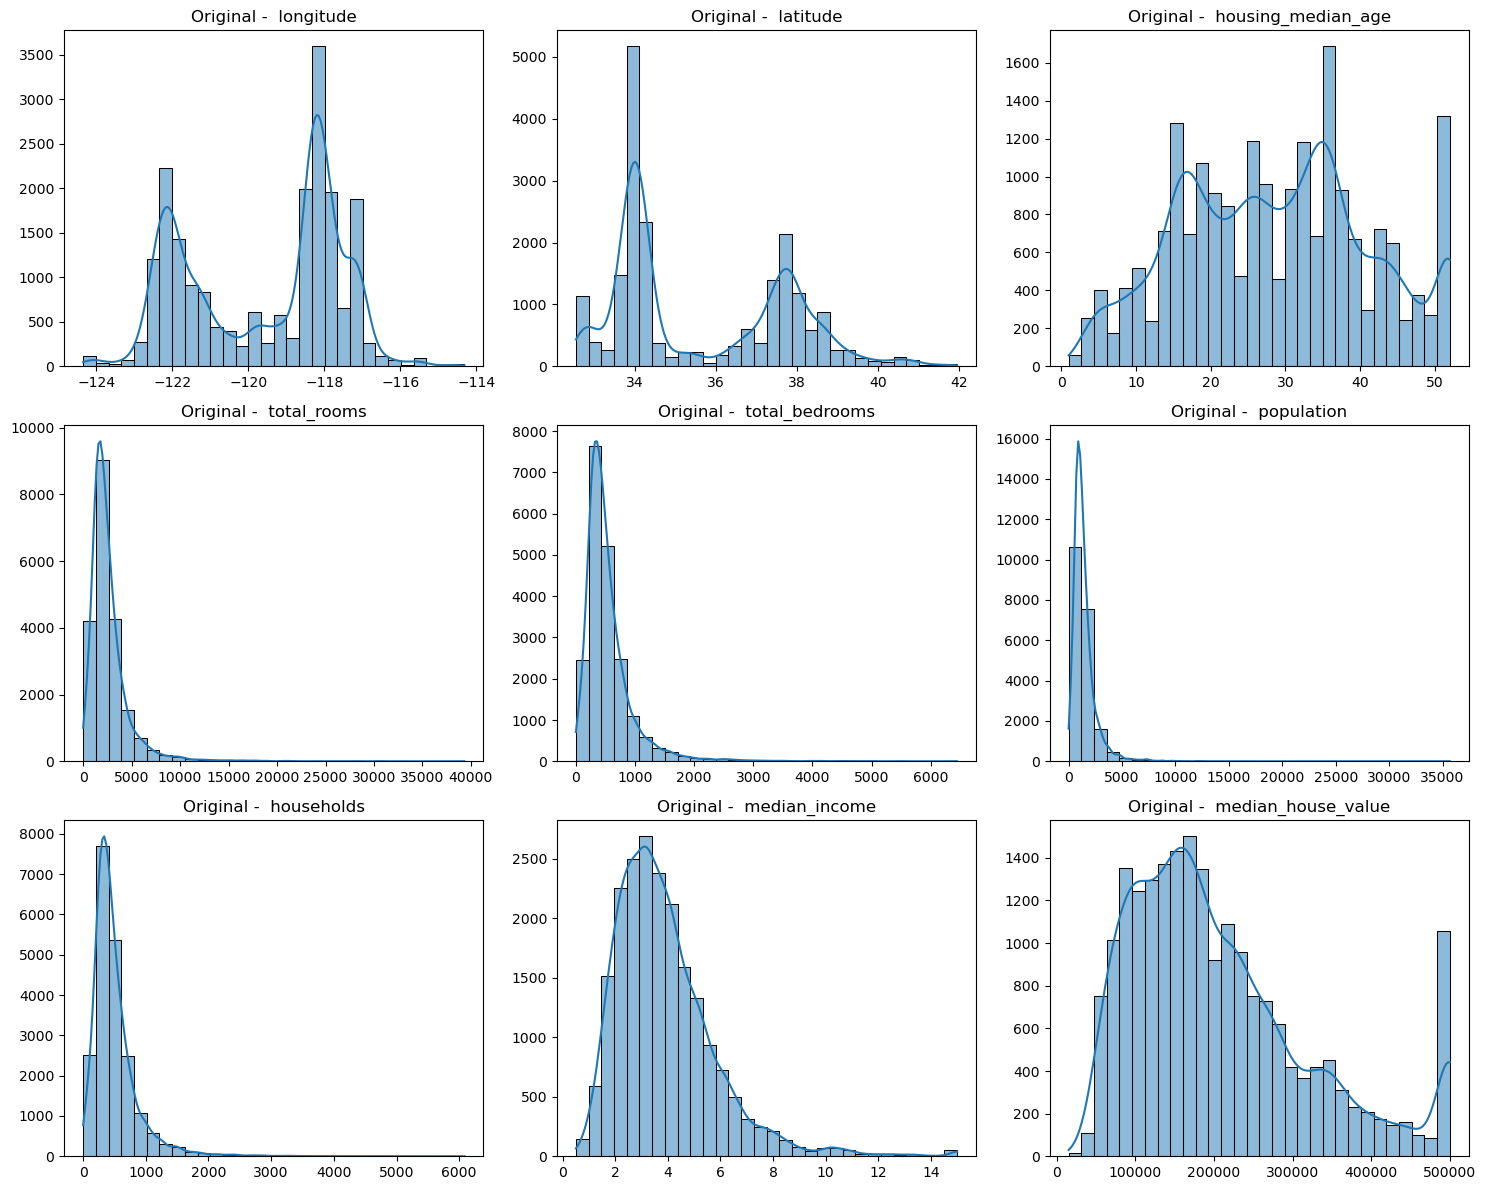

In [26]:
plot_all_histograms(df,title_prefix= "Original - ")

In [21]:
from scipy.stats import skew 

In [28]:
df_target_clean.apply(skew).sort_values(ascending=False)

ocean_proximity_ISLAND        62.536391
population                     4.961787
total_rooms                    4.228578
total_bedrooms                 3.479223
households                     3.406650
ocean_proximity_NEAR BAY       2.560066
ocean_proximity_NEAR OCEAN     2.287085
median_income                  0.889306
median_house_value             0.755894
ocean_proximity_INLAND         0.708083
latitude                       0.455656
housing_median_age             0.070466
longitude                     -0.289687
dtype: float64

In [32]:
X = df_target_clean.drop("median_house_value", axis = 1) #Apply Yeo Johnson
y = df_target_clean["median_house_value"]  #Apply BoxCox

In [35]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [41]:
from sklearn.preprocessing import PowerTransformer

In [56]:
pt_X = PowerTransformer(method="yeo-johnson")
X_train_transformed = pt_X.fit_transform(X_train)
X_test_transformed = pt_X.transform(X_test)

In [71]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [73]:
column_names = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']  #removed "median_house_value" column(y)

In [75]:
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns = column_names)

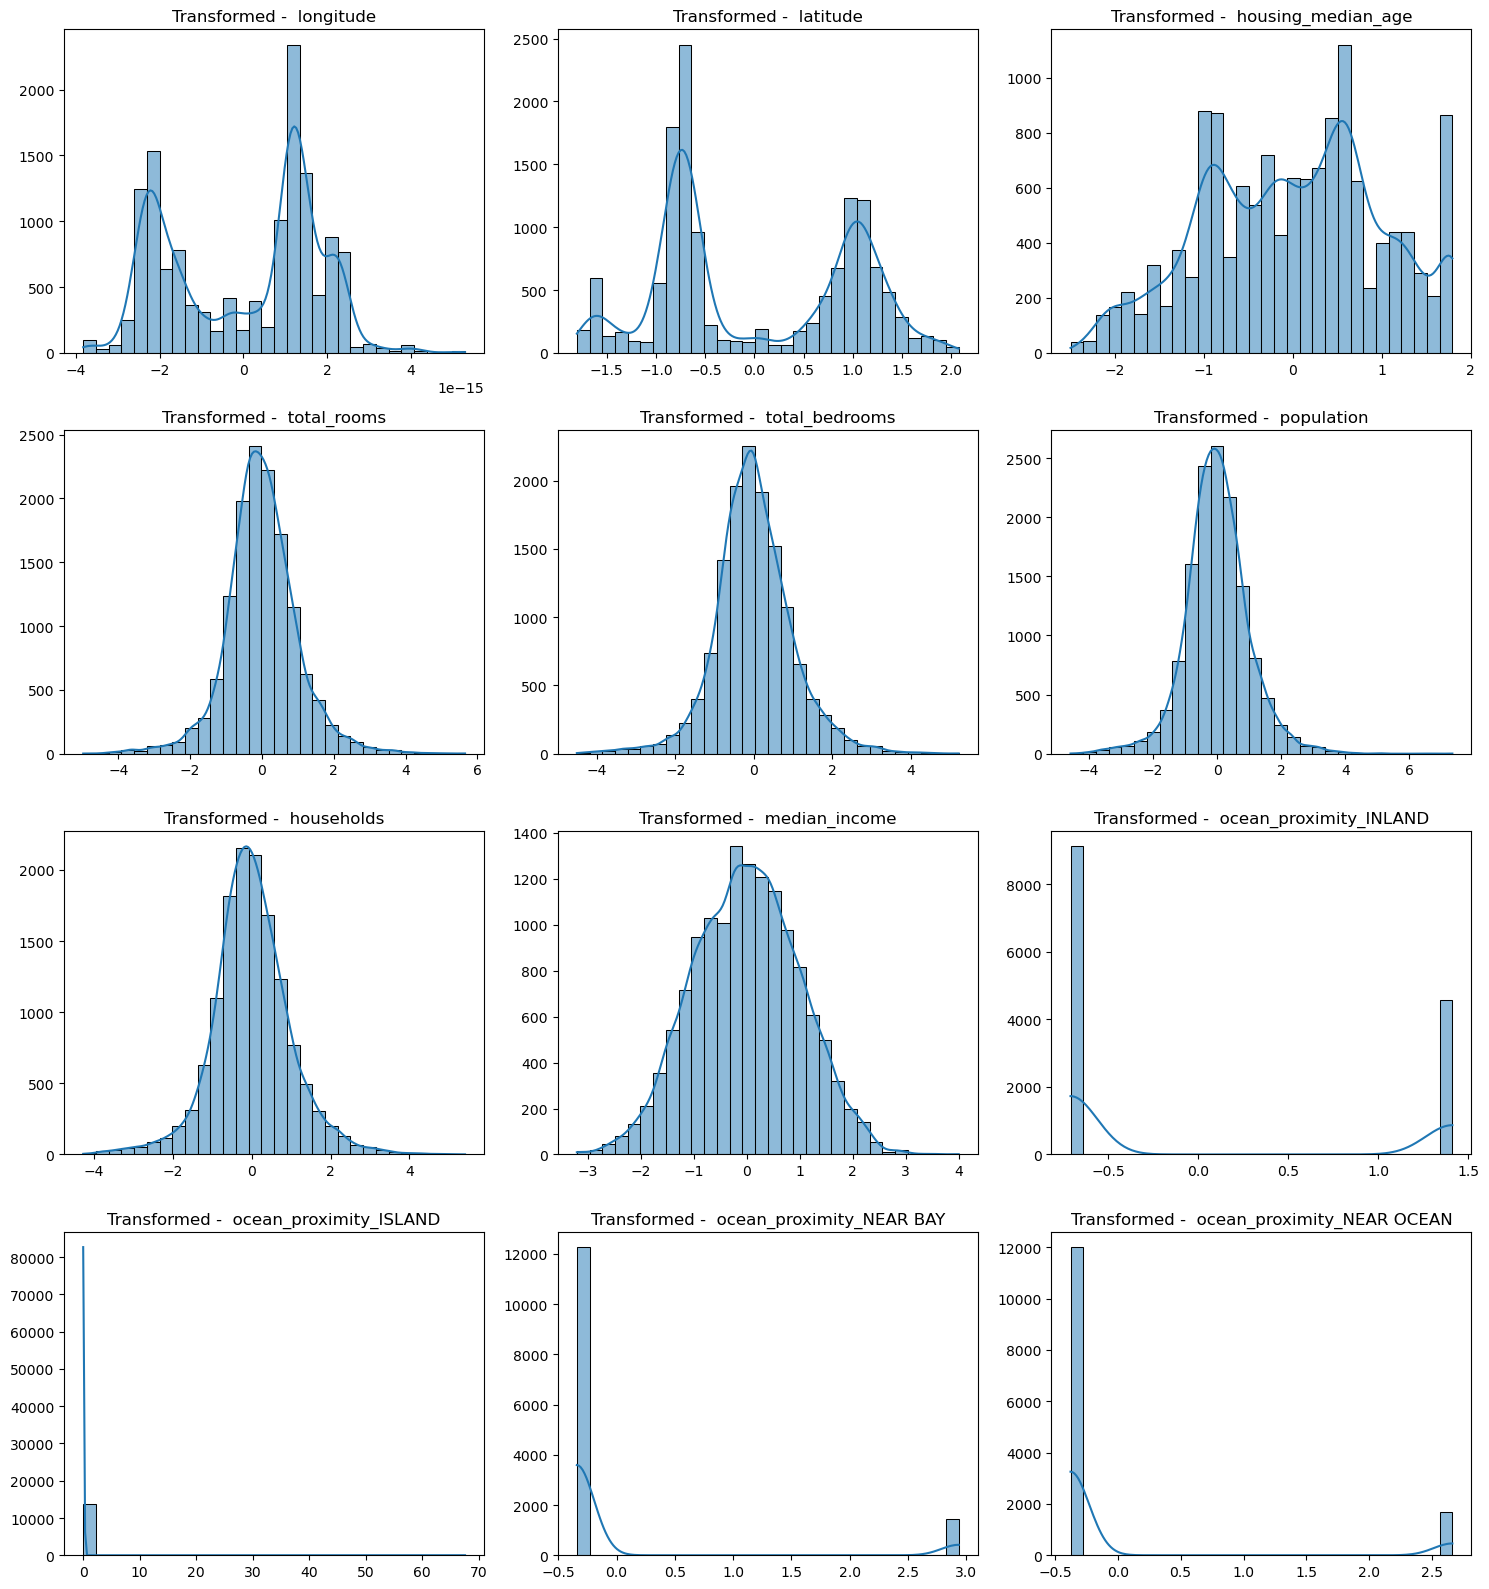

In [78]:
plot_all_histograms(X_train_transformed_df, title_prefix="Transformed - ")

In [81]:
from scipy.stats import boxcox

In [84]:
y_train_transformed, lambda_y = boxcox(y_train)

In [87]:
from xgboost import XGBRegressor

In [90]:
model = XGBRegressor()
model.fit(X_train_transformed, y_train_transformed)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [93]:
y_pred_transformed = model.predict(X_test_transformed)

In [96]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [101]:
print("R2 Score:", r2_score(y_test, y_pred_transformed))
print("MSE:", mean_squared_error(y_test, y_pred_transformed))
print("MAE:", mean_absolute_error(y_test, y_pred_transformed))

R2 Score: -3.963718489012308
MSE: 45879973092.483215
MAE: 191412.17551673704


In [104]:
def inverse_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.power(y * lambda_ + 1, 1 / lambda_)

y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)

In [107]:
print("R2 Score:", r2_score(y_test, y_pred_original))
print("MSE:", mean_squared_error(y_test, y_pred_original))
print("MAE:", mean_absolute_error(y_test, y_pred_original))

R2 Score: 0.8036382843012971
MSE: 1814984119.7869732
MAE: 28214.202960659386


In [109]:
# Result histograms(Original-Tranformed)



======================================== TRANSFORMED ========================================




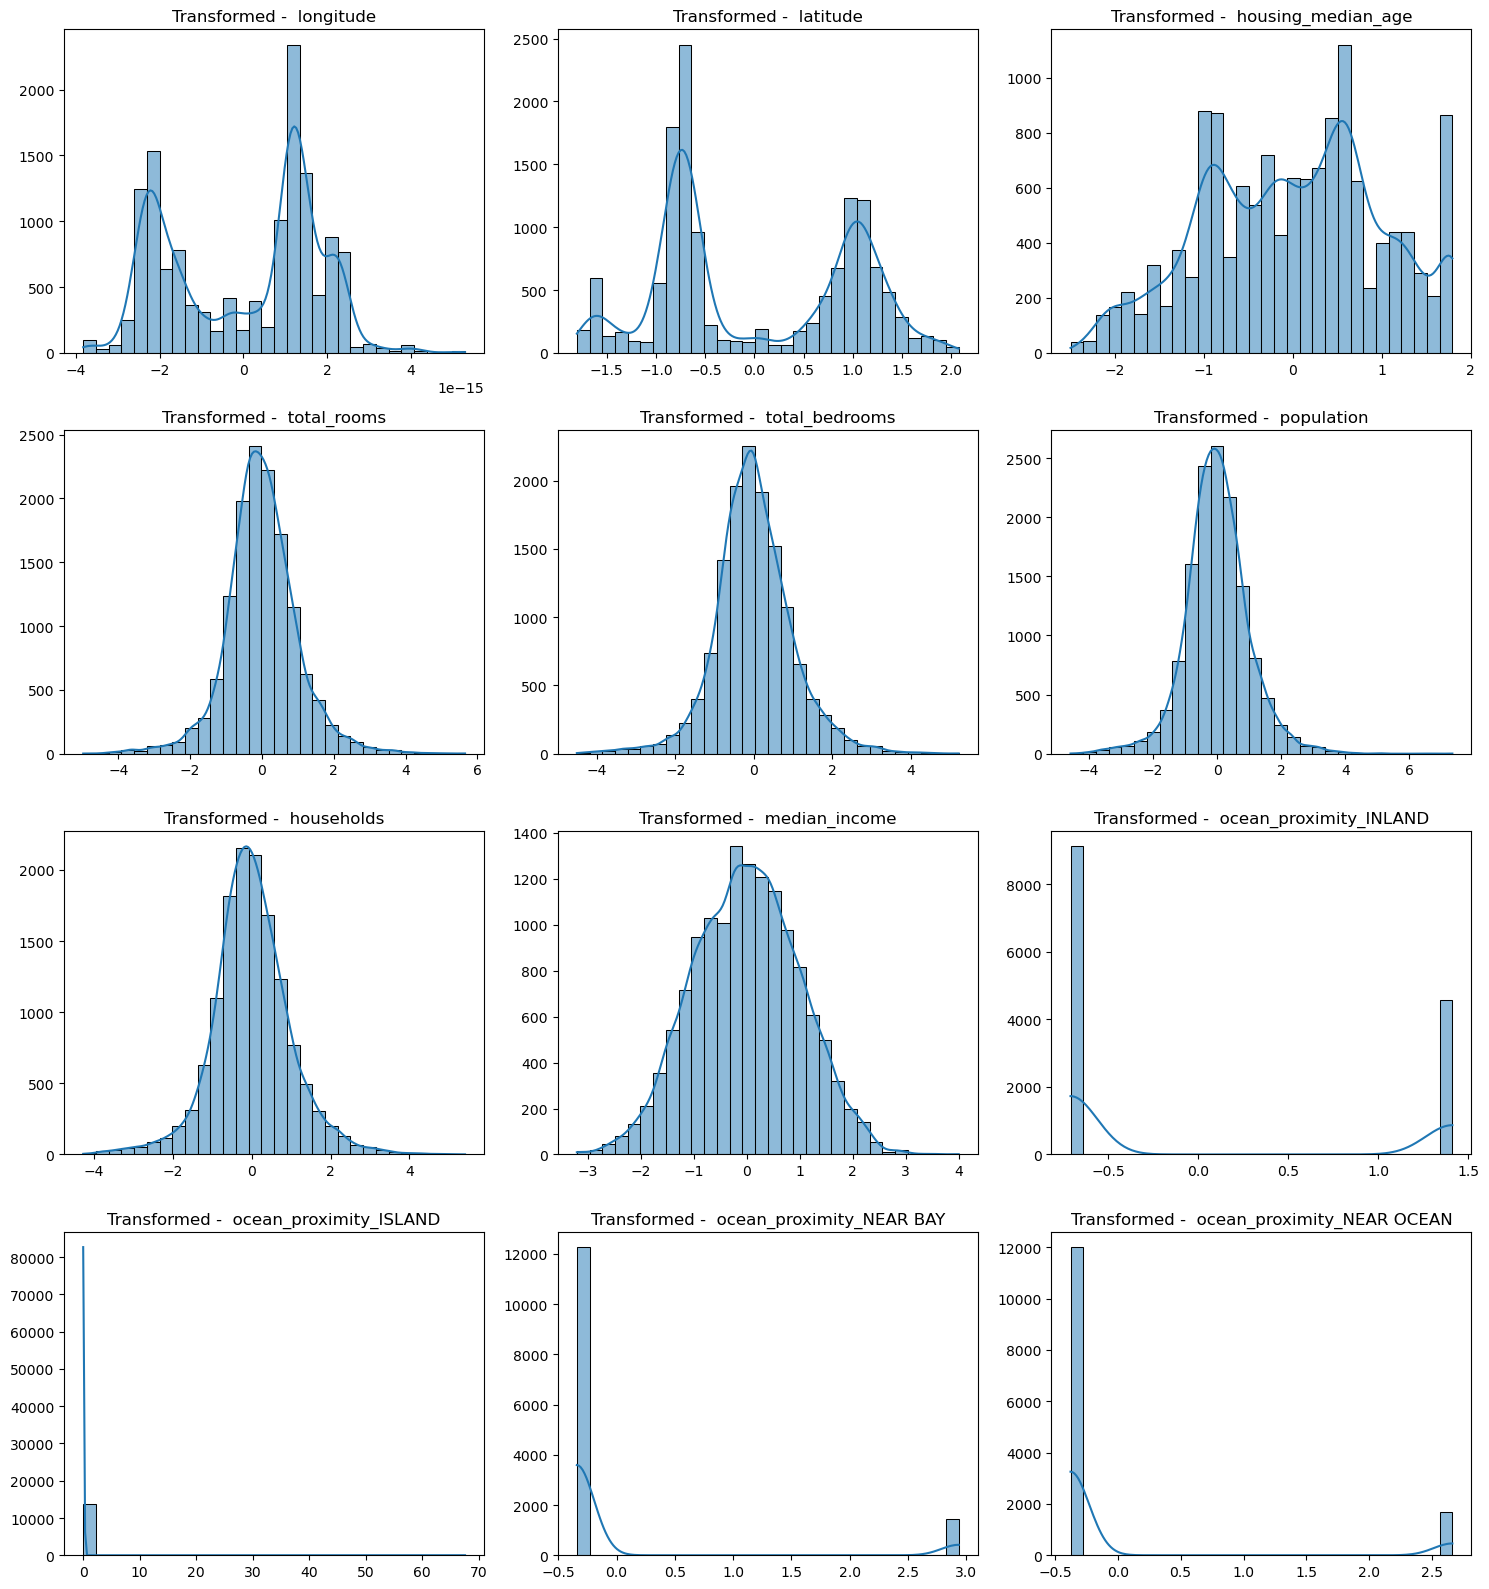



======================================== ORIGINAL ========================================




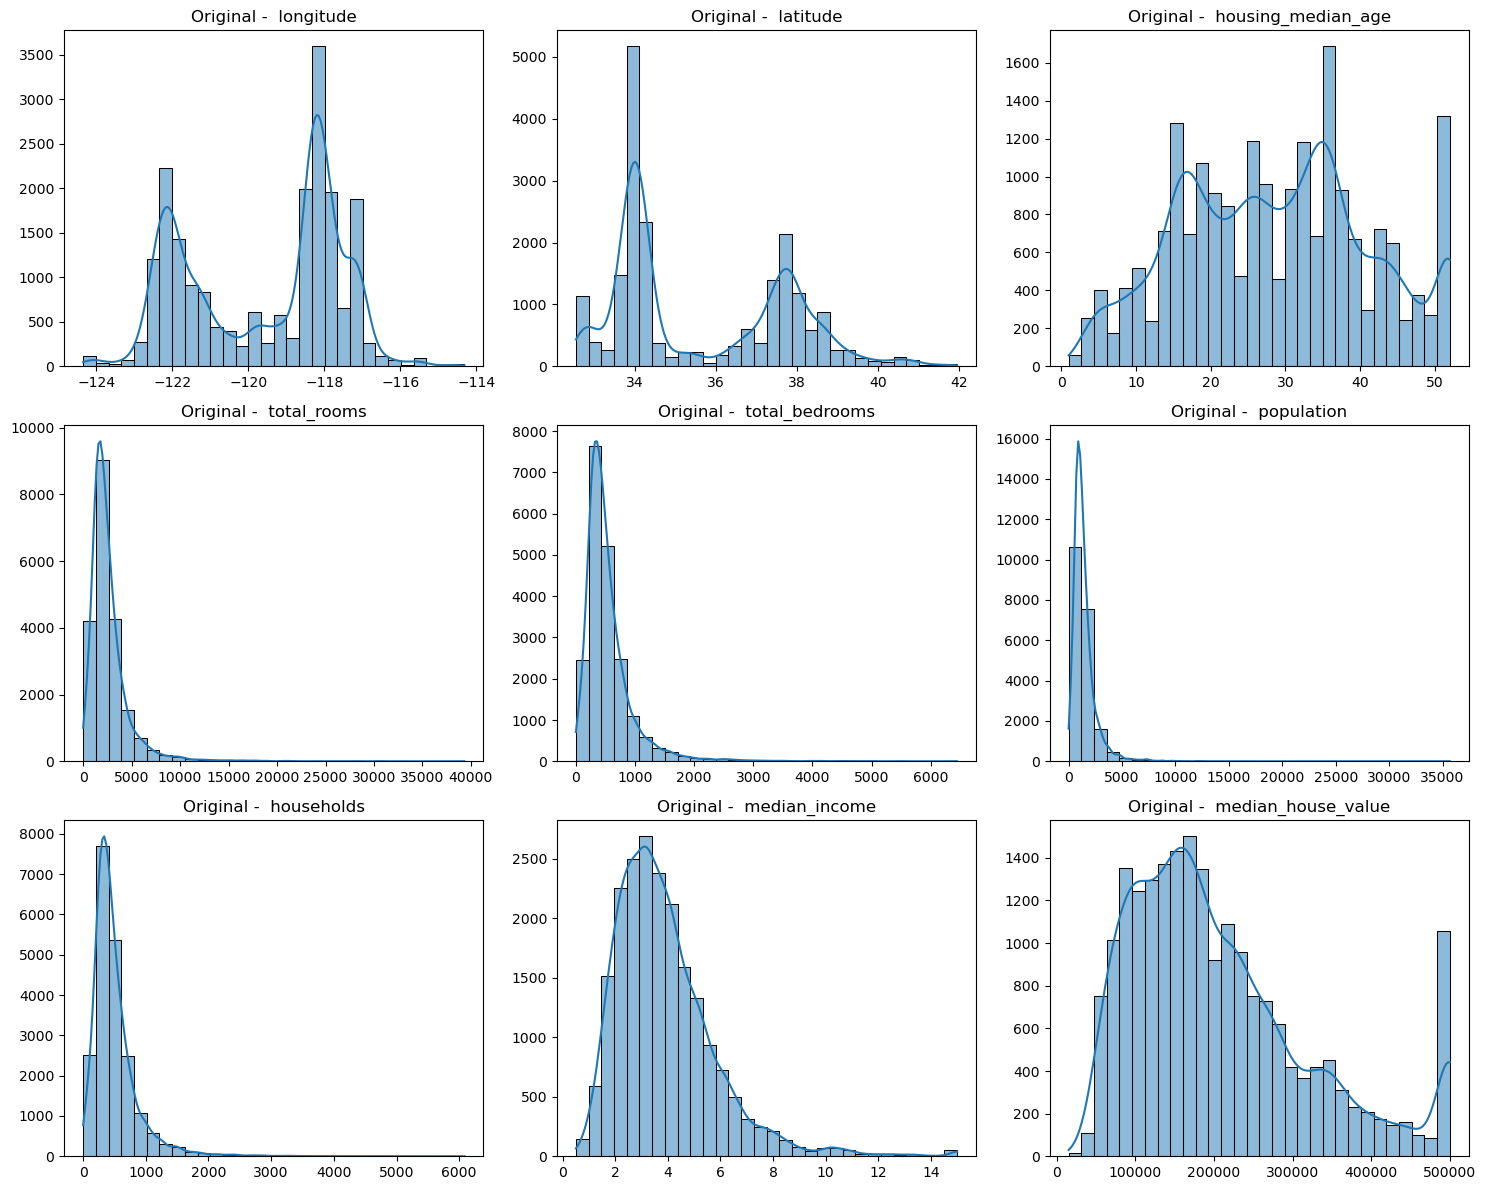

In [123]:
print(f"\n\n{'='*40} TRANSFORMED {'='*40}\n\n")
plot_all_histograms(X_train_transformed_df, title_prefix="Transformed - ")
print(f"\n\n{'='*40} ORIGINAL {'='*40}\n\n")
plot_all_histograms(df,title_prefix= "Original - ")